```
Topic:        Challenge Set 1
Subject:      Explore MTA turnstile data
Date:         07/06/2020
Name:         David Weon
Worked with:  Adam Rauckhorst, Dyllan Usher
```

### Challenge 1

In [5]:
import pandas as pd
df1 = pd.read_csv('turnstile_200606.txt')
df2 = pd.read_csv('turnstile_200613.txt')
df3 = pd.read_csv('turnstile_200620.txt')
df4 = pd.concat([df1,df2,df3])
df4

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553
...,...,...,...,...,...,...,...,...,...,...,...
206734,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,05:00:00,REGULAR,5554,514
206735,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,09:00:00,REGULAR,5554,514
206736,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,13:00:00,REGULAR,5554,514
206737,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,17:00:00,REGULAR,5554,514


In [7]:
df4.reset_index(inplace=True)

In [8]:
df4.columns = [column.strip() for column in df4.columns]

### Challenge 2

In [10]:
type(df4['DATE'])

pandas.core.series.Series

In [11]:
type(df4['TIME'])

pandas.core.series.Series

In [12]:
pd.to_datetime(df4['DATE'] + ' ' + df4['TIME'])

0        2020-05-30 00:00:00
1        2020-05-30 04:00:00
2        2020-05-30 08:00:00
3        2020-05-30 12:00:00
4        2020-05-30 16:00:00
                 ...        
621288   2020-06-19 05:00:00
621289   2020-06-19 09:00:00
621290   2020-06-19 13:00:00
621291   2020-06-19 17:00:00
621292   2020-06-19 21:00:00
Length: 621293, dtype: datetime64[ns]

In [47]:
df4['DATETIME'] = pd.to_datetime(df4['DATE'] + ' ' + df4['TIME'], format="%m/%d/%Y %H:%M:%S")
df4

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621288,206734,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,05:00:00,REGULAR,5554,514,2020-06-19 05:00:00
621289,206735,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,09:00:00,REGULAR,5554,514,2020-06-19 09:00:00
621290,206736,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,13:00:00,REGULAR,5554,514,2020-06-19 13:00:00
621291,206737,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/19/2020,17:00:00,REGULAR,5554,514,2020-06-19 17:00:00


### Challenge 3

In [15]:
#checking for duplicates
(df4
.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES", ascending=False)
.head())

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-05-30 00:00:00,1
414189,R138,R293,00-06-00,34 ST-PENN STA,2020-06-01 18:00:00,1
414191,R138,R293,00-06-00,34 ST-PENN STA,2020-06-02 02:00:00,1
414192,R138,R293,00-06-00,34 ST-PENN STA,2020-06-02 06:00:00,1
414193,R138,R293,00-06-00,34 ST-PENN STA,2020-06-02 10:00:00,1


In [48]:
df4 = df4.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [54]:
turnstiles_daily = (df4
                   .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                   .ENTRIES.first())

In [55]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [57]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [58]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
798,A011,R080,01-03-00,57 ST-7 AV,05/31/2020,885664857,05/30/2020,885664914.0
799,A011,R080,01-03-00,57 ST-7 AV,06/01/2020,885664810,05/31/2020,885664857.0
800,A011,R080,01-03-00,57 ST-7 AV,06/02/2020,885664701,06/01/2020,885664810.0
801,A011,R080,01-03-00,57 ST-7 AV,06/03/2020,885664602,06/02/2020,885664701.0
802,A011,R080,01-03-00,57 ST-7 AV,06/04/2020,885664496,06/03/2020,885664602.0


In [62]:
import datetime

mask = ((df4["C/A"] == "A011") & 
(df4["UNIT"] == "R080") & 
(df4["SCP"] == "01-03-00") & 
(df4["STATION"] == "57 ST-7 AV") &
(df4["DATETIME"].dt.date == datetime.datetime(2020, 5, 30).date()))
df4[mask].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATETIME
1596,1596,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,00:00:00,885664914,2020-05-30 00:00:00
1597,1597,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,04:00:00,885664912,2020-05-30 04:00:00
1598,1598,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,08:00:00,885664907,2020-05-30 08:00:00
1599,1599,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,12:00:00,885664900,2020-05-30 12:00:00
1600,1600,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/30/2020,16:00:00,885664884,2020-05-30 16:00:00


In [63]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         20
A025  R023  01-03-01  34 ST-HERALD SQ    20
A049  R088  02-05-00  CORTLANDT ST        4
A050  R088  00-05-01  CORTLANDT ST        1
A066  R118  00-00-00  CANAL ST           20
                                         ..
R511  R091  00-03-01  36 AV               1
R523  R147  00-00-04  61 ST WOODSIDE     20
R609  R056  01-03-00  NEVINS ST           1
R622  R123  00-00-00  FRANKLIN AV        20
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 75, dtype: int64

In [66]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

136 8235039.0
18 2090862.0
98 1200414.0
2555909 514061.0
37 6871440.0
5 235111076.0
16 1098379.0
917548 9259448.0
6 6362738.0
28 4362577.0
6118023 39945.0


## Challenge 4

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

In [68]:
#selecting one turnstile
filt = (turnstiles_daily['C/A']=='A002')&(turnstiles_daily['UNIT']=='R051')&(turnstiles_daily['SCP']=='02-00-00')&(turnstiles_daily['STATION']=='59 ST')

In [69]:
turnstiles_daily[filt]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/31/2020,7420000,05/30/2020,7419887.0,113.0
2,A002,R051,02-00-00,59 ST,06/01/2020,7420099,05/31/2020,7420000.0,99.0
3,A002,R051,02-00-00,59 ST,06/02/2020,7420257,06/01/2020,7420099.0,158.0
4,A002,R051,02-00-00,59 ST,06/03/2020,7420420,06/02/2020,7420257.0,163.0
5,A002,R051,02-00-00,59 ST,06/04/2020,7420584,06/03/2020,7420420.0,164.0
6,A002,R051,02-00-00,59 ST,06/05/2020,7420744,06/04/2020,7420584.0,160.0
7,A002,R051,02-00-00,59 ST,06/06/2020,7420920,06/05/2020,7420744.0,176.0
8,A002,R051,02-00-00,59 ST,06/07/2020,7421025,06/06/2020,7420920.0,105.0
9,A002,R051,02-00-00,59 ST,06/08/2020,7421148,06/07/2020,7421025.0,123.0
10,A002,R051,02-00-00,59 ST,06/09/2020,7421389,06/08/2020,7421148.0,241.0


Text(0, 0.5, 'Daily Entries')

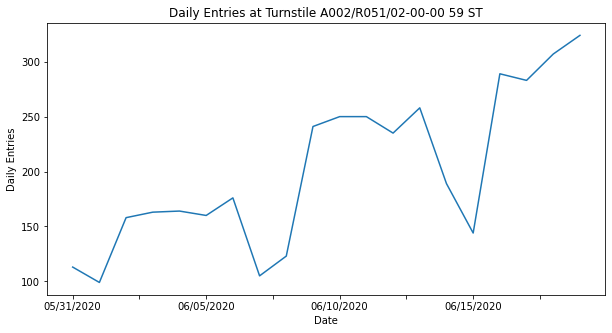

In [71]:
turnstiles_daily[filt].plot(x='DATE', y='DAILY_ENTRIES',kind='line',figsize=(10,5),legend=False, title='Daily Entries at Turnstile A002/R051/02-00-00 59 ST')
plt.xlabel('Date')
plt.ylabel('Daily Entries')

### Challenge 5

In [72]:
turnstiles_daily.groupby(['C/A','UNIT','STATION','DATE']).DAILY_ENTRIES.sum()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          05/31/2020    1001.0
                            06/01/2020     752.0
                            06/02/2020    1526.0
                            06/03/2020    1630.0
                            06/04/2020    1511.0
                                           ...  
TRAM2  R469  RIT-ROOSEVELT  06/15/2020    1525.0
                            06/16/2020    1022.0
                            06/17/2020    1019.0
                            06/18/2020    1019.0
                            06/19/2020    1085.0
Name: DAILY_ENTRIES, Length: 14964, dtype: float64

### Challenge 6

In [75]:
turnstiles_daily.groupby(['STATION','DATE']).DAILY_ENTRIES.sum()

STATION    DATE      
1 AV       05/31/2020    1335.0
           06/01/2020    1073.0
           06/02/2020    2260.0
           06/03/2020    2346.0
           06/04/2020    2306.0
                          ...  
ZEREGA AV  06/15/2020     253.0
           06/16/2020     589.0
           06/17/2020     509.0
           06/18/2020     619.0
           06/19/2020     602.0
Name: DAILY_ENTRIES, Length: 7577, dtype: float64

### Challenge 7

In [76]:
stations = turnstiles_daily.groupby(['STATION','DATE']).DAILY_ENTRIES.sum().reset_index()

In [77]:
filt2 = (stations['STATION'] == '1 AV')

Text(0.5, 1.0, 'Daily Entries at 1 AV Station')

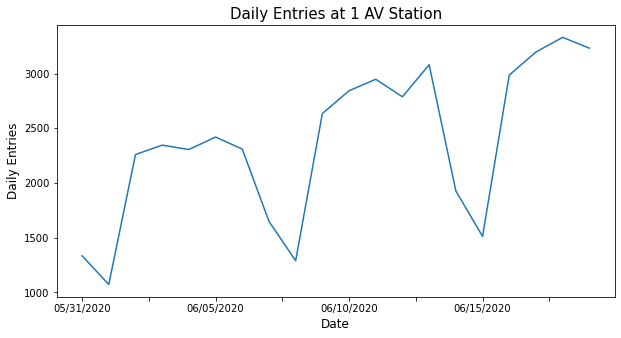

In [79]:
stations[filt2].plot(x='DATE', y='DAILY_ENTRIES',kind='line',figsize=(10,5),legend=False)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Daily Entries at 1 AV Station', fontsize=15)

### Challenge 8

In [80]:
stations['DATE'] = pd.to_datetime(stations['DATE'])

In [81]:
stations['DAY'] = stations['DATE'].dt.dayofweek

In [82]:
stations['DATE'].dt.week
stations['WEEK_NUMBER'] = stations['DATE'].dt.week
stations.head(50)

,STATION,DATE,DAILY_ENTRIES,DAY,WEEK_NUMBER
0,1 AV,2020-05-31,1335.0,6,22
1,1 AV,2020-06-01,1073.0,0,23
2,1 AV,2020-06-02,2260.0,1,23
3,1 AV,2020-06-03,2346.0,2,23
4,1 AV,2020-06-04,2306.0,3,23
5,1 AV,2020-06-05,2420.0,4,23
6,1 AV,2020-06-06,2310.0,5,23
7,1 AV,2020-06-07,1650.0,6,23
8,1 AV,2020-06-08,1290.0,0,24
9,1 AV,2020-06-09,2635.0,1,24


In [83]:
first_av = stations[filt2]

In [84]:
week23_start = '2020-06-01'
week23_end = '2020-06-07'
week23 = (first_av['DATE']>=week23_start) & (first_av['DATE']<=week23_end)
week23_df = first_av.loc[week23]

In [86]:
week23_count_list = []
for elem in week23_df['DAILY_ENTRIES']:
    week23_count_list.append(elem)

week23_count_list

[1073.0, 2260.0, 2346.0, 2306.0, 2420.0, 2310.0, 1650.0]

In [87]:
week24_start = '2020-06-08'
week24_end = '2020-06-14'
week24 = (first_av['DATE']>=week24_start) & (first_av['DATE']<=week24_end)
week24_df = first_av.loc[week24]

In [88]:
week24_count_list = []
for elem in week24_df['DAILY_ENTRIES']:
    week24_count_list.append(elem)

week24_count_list

[1290.0, 2635.0, 2843.0, 2948.0, 2788.0, 3081.0, 1928.0]

In [89]:
week25_start = '2020-06-15'
week25_end = '2020-06-21'
week25 = (first_av['DATE']>=week25_start) & (first_av['DATE']<=week25_end)
week25_df = first_av.loc[week25]

In [90]:
week25_count_list = []
for elem in week25_df['DAILY_ENTRIES']:
    week25_count_list.append(elem)

week25_count_list

[1512.0, 2986.0, 3197.0, 3331.0, 3232.0]

<Figure size 720x360 with 0 Axes>

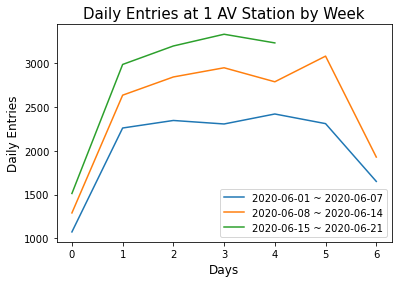

<Figure size 720x360 with 0 Axes>

In [91]:
plt.plot(week23_count_list, label='2020-06-01 ~ 2020-06-07')
plt.plot(week24_count_list, label='2020-06-08 ~ 2020-06-14')
plt.plot(week25_count_list, label='2020-06-15 ~ 2020-06-21')
plt.xlabel('Days',fontsize=12)
plt.ylabel('Daily Entries', fontsize=12)
plt.title('Daily Entries at 1 AV Station by Week', fontsize=15)
plt.legend(loc='lower right')
plt.figure(figsize=(10,5))

### Challenge 9

In [92]:
riders_perstation = stations.groupby(['STATION']).DAILY_ENTRIES.sum()

In [93]:
riders_perstation.sort_values(ascending=False)

STATION
B'WAY-LAFAYETTE    941982.0
116 ST             902201.0
JEFFERSON ST       593733.0
CORTLANDT ST       582937.0
GRD CNTRL-42 ST    548767.0
                     ...   
BEACH 98 ST          2108.0
BEACH 105 ST         1673.0
BROAD CHANNEL        1038.0
AQUEDUCT RACETR       481.0
ORCHARD BEACH           0.0
Name: DAILY_ENTRIES, Length: 379, dtype: float64

### Challenge 10

In [94]:
sorted_stations = riders_perstation.sort_values(ascending=False)

In [95]:
sorted_stations_list = []
for elem in sorted_stations:
    sorted_stations_list.append(elem)

<Figure size 720x360 with 0 Axes>

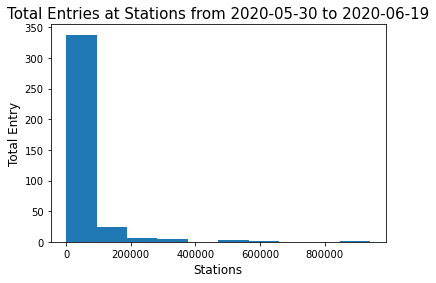

<Figure size 720x360 with 0 Axes>

In [96]:
plt.hist(sorted_stations_list)
plt.xlabel('Stations', fontsize = 12)
plt.ylabel('Total Entry', fontsize = 12)
plt.title('Total Entries at Stations from 2020-05-30 to 2020-06-19', fontsize = 15)
plt.figure(figsize=(10,5))

In [97]:
sorted_stations.reset_index()

,STATION,DAILY_ENTRIES
0,B'WAY-LAFAYETTE,941982.0
1,116 ST,902201.0
2,JEFFERSON ST,593733.0
3,CORTLANDT ST,582937.0
4,GRD CNTRL-42 ST,548767.0
...,...,...
374,BEACH 98 ST,2108.0
375,BEACH 105 ST,1673.0
376,BROAD CHANNEL,1038.0
377,AQUEDUCT RACETR,481.0


Text(0.5, 1.0, 'Total Entries at Stations from 2020-05-30 to 2020-06-19')

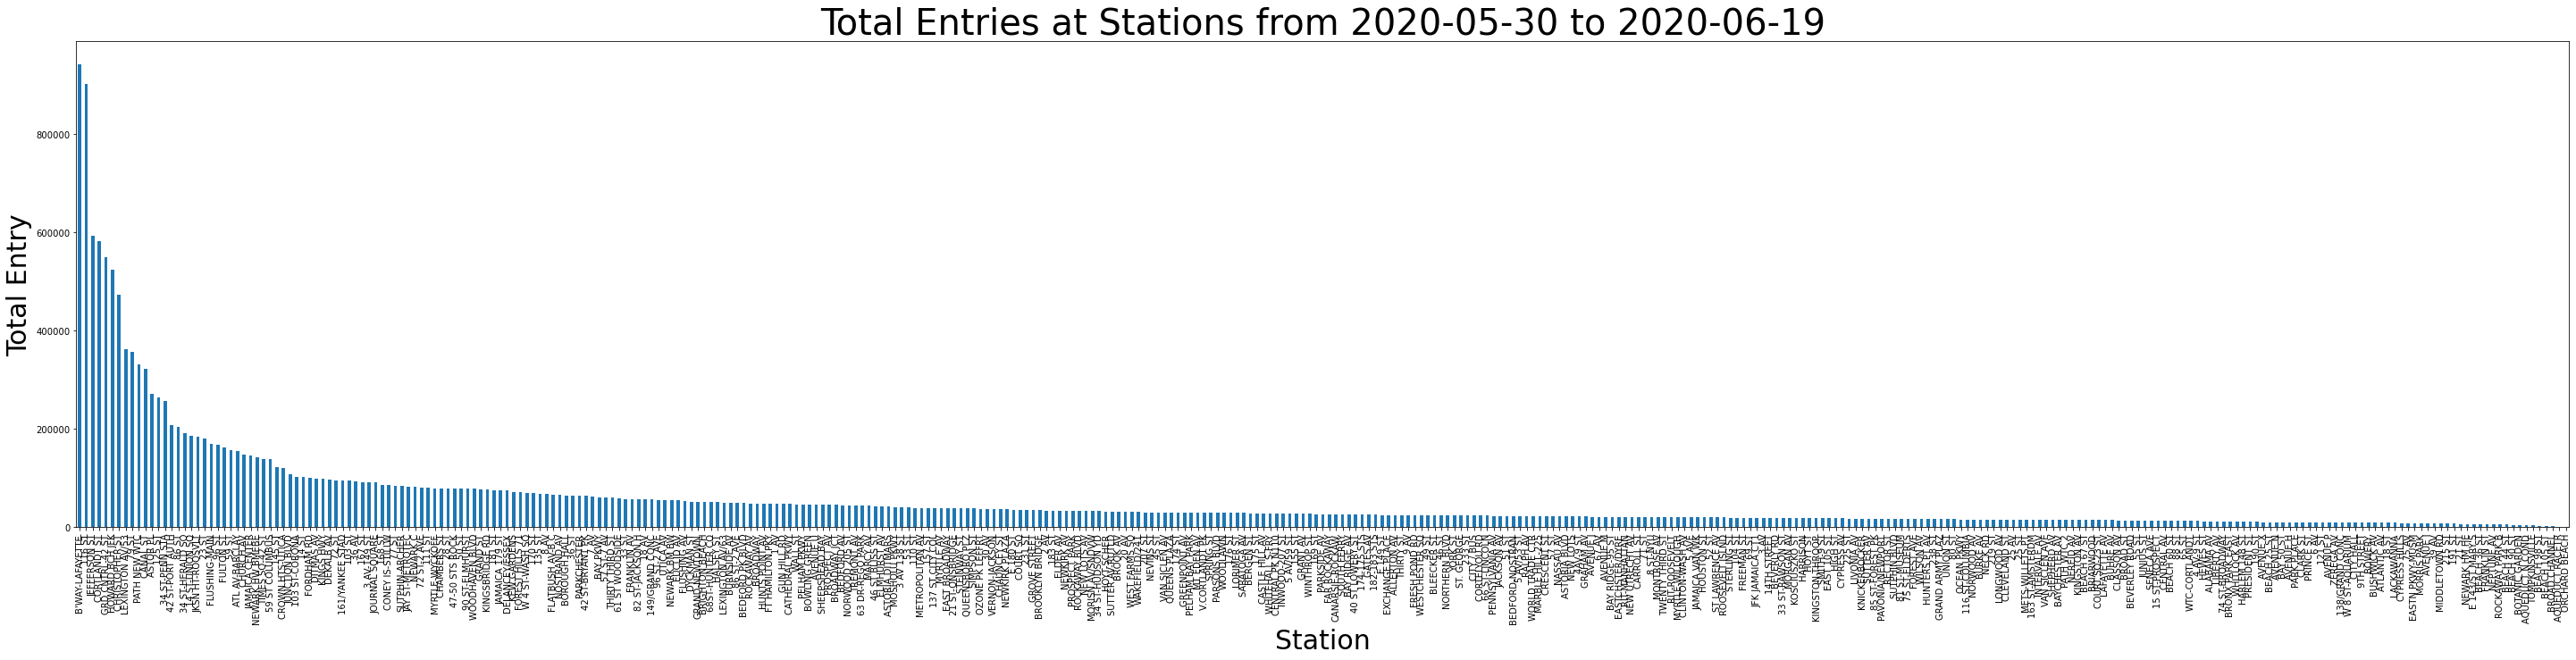

In [99]:
sorted_stations.plot(x='STATION', y='DAILY_ENTRIES',kind='bar',figsize=(50,10),legend=False)
plt.xlabel('Station',fontsize = 30)
plt.ylabel('Total Entry', fontsize = 30)
plt.title('Total Entries at Stations from 2020-05-30 to 2020-06-19', fontsize=40)